#WorkFlow

1. get data ready
2. build a linear regression model
3. pick a loss function and optimizer
4. build a training loop
5. evaluate ur model
6. test model with a new data point
7. save the model

##Importing Moduels


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

##Get Data Ready

In [2]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.182],
 [7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[3.1]],dtype=np.float32)

y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],
 [2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

In [3]:
x_train,y_train

(array([[ 3.3  ],
        [ 4.4  ],
        [ 5.5  ],
        [ 6.71 ],
        [ 6.93 ],
        [ 4.168],
        [ 9.779],
        [ 6.182],
        [ 7.59 ],
        [ 2.167],
        [ 7.042],
        [10.791],
        [ 5.313],
        [ 7.997],
        [ 3.1  ]], dtype=float32),
 array([[1.7  ],
        [2.76 ],
        [2.09 ],
        [3.19 ],
        [1.694],
        [1.573],
        [3.366],
        [2.596],
        [2.53 ],
        [1.221],
        [2.827],
        [3.465],
        [1.65 ],
        [2.904],
        [1.3  ]], dtype=float32))

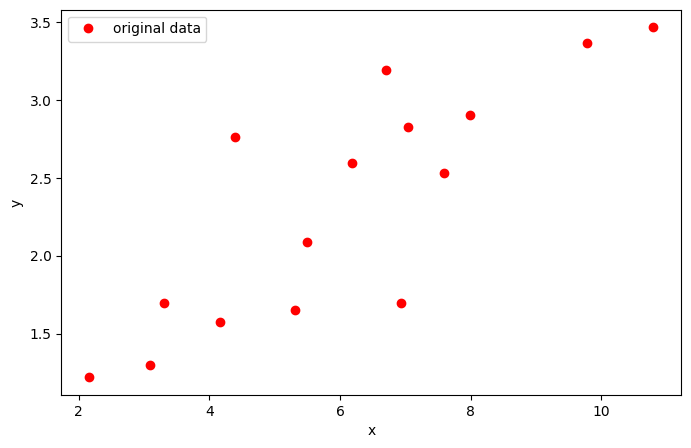

In [4]:
fig = plt.figure(figsize=(8,5))
plt.plot(x_train,y_train,'ro',label='original data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [6]:
x_train,y_train

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]))

##Build a Linear Regression Model

1. **nn.Module**:

Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in a tree structure.

2. **Linear**:

torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None).
This module supports TensorFloat32.


In [29]:
class LinearRegression(nn.Module):

  def __init__(self):  # As per the example above, an __init__() call to the parent class must be made before assignment on the child.

    super().__init__() # Inheriting the nn.Module and constructor of Module shoud be used
    self.linear = nn.Linear(1,1) # Applies an affine linear transformation to the incoming data: y=xA+b

  def forward(self,x):
    return self.linear(x)

In [30]:
model = LinearRegression()

In [31]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [32]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.3376]])),
             ('linear.bias', tensor([0.1174]))])

In [33]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3376]], requires_grad=True),
 Parameter containing:
 tensor([0.1174], requires_grad=True)]

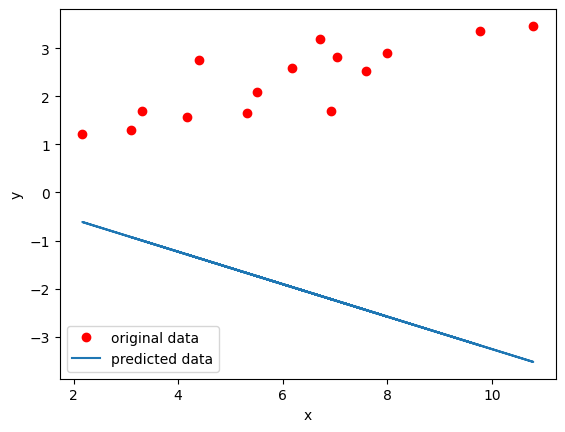

In [34]:
# lets see the line using matplotlib
plt.plot(x_train,y_train,'ro',label='original data')
plt.plot(x_train,model(x_train).detach().numpy(),label='predicted data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

##Pick a loss function and optimizer

In [35]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-4) #0.0001

##Build a Training loop

In [36]:
# number of epochs we will take
num_epochs = 1000

In [40]:
for epoch in range(num_epochs):

  # to initiate training
  model.train()
  y_pred = model(x_train) #forward pass

  # to calculate loss
  loss = criterion(y_pred,y_train)
  optimizer.zero_grad()

  # back prapogation
  loss.backward()
  optimizer.step()

  if (epoch+1)%20 == 0:
    print(f'epoch: {epoch+1} / {num_epochs}, loss = {loss.item():.4f}')

epoch: 20 / 1000, loss = 0.2043
epoch: 40 / 1000, loss = 0.2043
epoch: 60 / 1000, loss = 0.2042
epoch: 80 / 1000, loss = 0.2042
epoch: 100 / 1000, loss = 0.2041
epoch: 120 / 1000, loss = 0.2041
epoch: 140 / 1000, loss = 0.2041
epoch: 160 / 1000, loss = 0.2040
epoch: 180 / 1000, loss = 0.2040
epoch: 200 / 1000, loss = 0.2040
epoch: 220 / 1000, loss = 0.2039
epoch: 240 / 1000, loss = 0.2039
epoch: 260 / 1000, loss = 0.2039
epoch: 280 / 1000, loss = 0.2038
epoch: 300 / 1000, loss = 0.2038
epoch: 320 / 1000, loss = 0.2038
epoch: 340 / 1000, loss = 0.2037
epoch: 360 / 1000, loss = 0.2037
epoch: 380 / 1000, loss = 0.2036
epoch: 400 / 1000, loss = 0.2036
epoch: 420 / 1000, loss = 0.2036
epoch: 440 / 1000, loss = 0.2035
epoch: 460 / 1000, loss = 0.2035
epoch: 480 / 1000, loss = 0.2035
epoch: 500 / 1000, loss = 0.2034
epoch: 520 / 1000, loss = 0.2034
epoch: 540 / 1000, loss = 0.2034
epoch: 560 / 1000, loss = 0.2033
epoch: 580 / 1000, loss = 0.2033
epoch: 600 / 1000, loss = 0.2033
epoch: 620 / 1

In [41]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3328]])),
             ('linear.bias', tensor([0.2410]))])

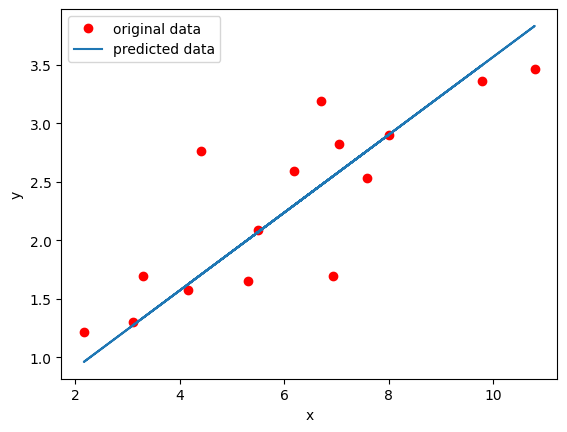

In [42]:
# lets see the line using matplotlib
plt.plot(x_train,y_train,'ro',label='original data')
plt.plot(x_train,model(x_train).detach().numpy(),label='predicted data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

##Evaluate the Model

In [43]:
model.eval()
with torch.no_grad():
  predicted = model(x_train)
predicted.data.numpy()

array([[1.3392806],
       [1.705363 ],
       [2.0714452],
       [2.4741359],
       [2.5473523],
       [1.628153 ],
       [3.4955056],
       [2.2984164],
       [2.7670016],
       [0.9622159],
       [2.584626 ],
       [3.8323011],
       [2.0092113],
       [2.9024522],
       [1.2727202]], dtype=float32)